In [1]:
from __future__ import print_function, division

# Statistical charts with `seaborn` 




In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
columns=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
raw_mpg = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
                      header=None,
                      delim_whitespace=True,
                      names=columns,
                      usecols=columns,
                      na_values="?", 
                      quoting=2,
                      quotechar='"',
                      dtype={"cylinders": np.int64, 
                             "model year": np.int64,
                             "origin": np.int64}) 

In [59]:
raw_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [60]:
raw_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


We investigate the `mpg` dataset using charts generated by `seaborn`. The task associated with this dataset is to predict the `mpg` (Miles per Gallon) variable in terms of 5 continuous variables and 3 discrete ones. 

*Source: (https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names)*

## Histograms

A fundamental tool to investigate continuous variables is the use of histograms. This chart is available by calling the `distplot` function in `seaborn`. 

Here, we want to visualize the distribution of miles per gallon variable. 

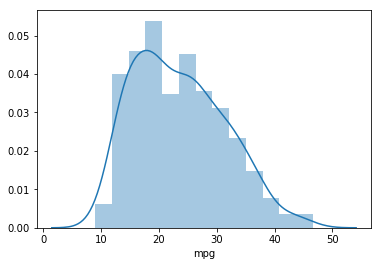

In [72]:
sns.distplot(raw_mpg.mpg)

The basic seaborn chart displays a histogram and a kernel density estimate (KDE) of the distribution. The KDE can be turned off by setting the `kde` keyword argument to `False` (the default is `True`). 

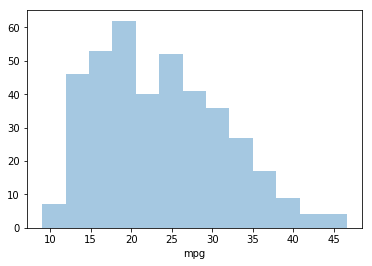

In [73]:
sns.distplot(raw_mpg.mpg, kde=False)

We add in little markers to the plot for each data point. This helps give us a better understanding of the density of the variable

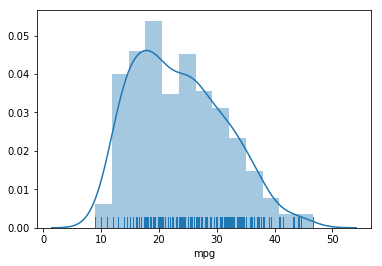

In [74]:
sns.distplot(raw_mpg.mpg, rug=True)

The bin size of a histogram can be customised by passing the desired number of bins to the `bins` argument of the function. 

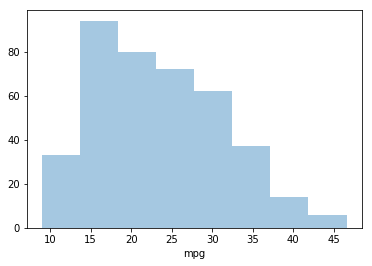

In [75]:
sns.distplot(raw_mpg.mpg, kde=False, bins=8 )

Note that the smaller the number of bins, the distribution becomes coarser and more details of the distribution is left out. 

We can also drop the histogram and just plot a KDE estimate of the distribution. Below we plot a rugplot as well and shade in the KDE using a dictionary to pass extra arguments to the underlying KDE plotter. 

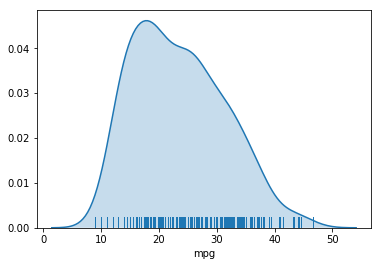

In [76]:
sns.distplot(raw_mpg.mpg, hist=False, rug=True, kde_kws={"shade": True})

Finally, let's add in a legend label and change the color of the plot, give it a title and further customize the plot by adding a title. 

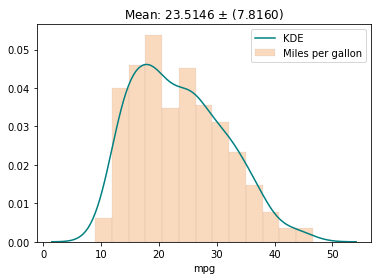

In [100]:
g = sns.distplot(raw_mpg.mpg, kde=True, color="sandybrown", label="Miles per gallon",
                 hist_kws={"ec": "black", # border color of each bar in the histogram
                           "lw": 0.1},  # the thickness of the border
                 kde_kws={"label": "KDE", # labels the KDE estimate line so that it shows up on the legend
                          "color": "teal"}) # color the of KDE line
g.legend()
g.set_title("Mean: %.4f $\pm$ (%.4f)" % (raw_mpg.mpg.mean(), raw_mpg.mpg.std()))

## Analysis of nominal variables with a bar chart
The `mpg` dataset has three categorical or nomimal variables. One basic way to understand nominal data its through a frequency count. To create frequency bar charts use the `countplot` command. 

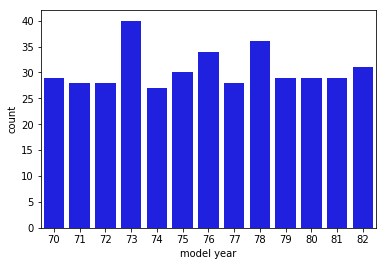

In [116]:
sns.countplot(raw_mpg["model year"], color="blue")

It is also possible to display the bars horizontally. 

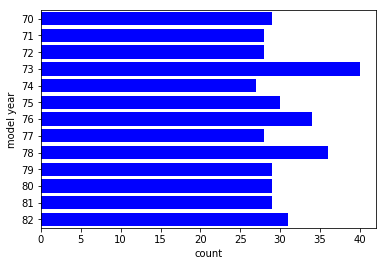

In [121]:
sns.countplot(y=raw_mpg["model year"], color="blue", saturation=1)

We may want to display the counts of cars with different cylinders along with the model year by passing data to the `hue` argument. Now we enter the arguments in a different manner, passing the column name to `x` and the data frame to the `data` argument. The cylinders are passed to the `hue` keyword. 

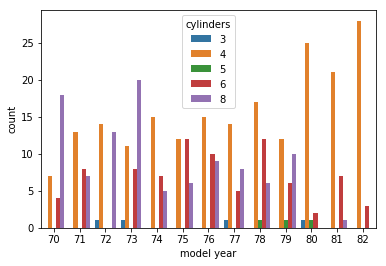

In [123]:
sns.countplot(x="model year", hue="cylinders", data=raw_mpg, )

The default settings for such a plot is not really beautiful. So let's change it into a **stacked** barplot, orient it horizontally, add a title and move the position of the legend to outside the plot axis. 

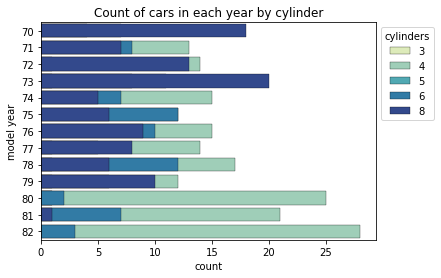

In [5]:
g = sns.countplot(y="model year", hue="cylinders", data=raw_mpg, dodge=False, # dodge=True (default) crease bars side by side
                  palette="YlGnBu", lw=0.3, ec="black")
g.set_title("Count of cars in each year by cylinder")
g.legend(loc="upper left", bbox_to_anchor=(1,1), title="cylinders")

This tells us that the newer cars have 4 cylinders while older cars tend to have 8 cylinder engines. 

### Visualising aggregate data

How do we visualize the average miles per gallon for cars for a given model year? Note that this involves two variables, miles per gallon and the model year. For this we need `barplot`. 

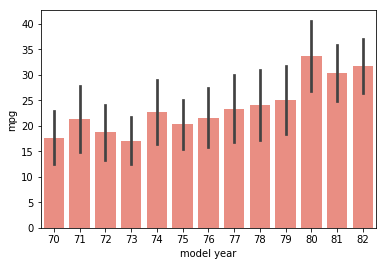

In [152]:
sns.barplot(x="model year", y="mpg", data=raw_mpg, estimator=np.mean, ci="sd", color="salmon")

The black bars indicate the standard deviation which gives a general idea of how spread out the mpg values are for a given model year. The option `estimator=count` is equivalent to `countplot`. 

Let's now finish with a chart showing the average mpg for place of origin. Before that, we note that orgin is numerically coded. So let's fill in the actual locations corresponding to the code (1=American, 2=European, 3=Japanese) 

In [6]:
raw_mpg["origin"] = raw_mpg["origin"].map({1: "American", 2:"European", 3:"Japanese"})

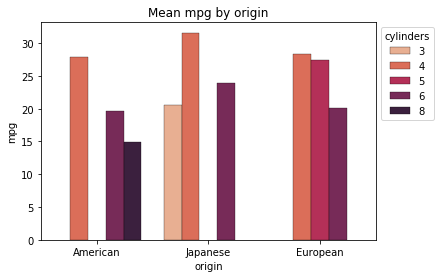

In [153]:
g = sns.barplot(hue="cylinders", y="mpg",x="origin", data=raw_mpg, palette="rocket_r",
                ci=None, estimator=np.mean, # note that mean is the default option
                lw=0.3, ec="black")
g.legend(title="cylinders", loc="upper left", bbox_to_anchor=(1,1))
g.set_title("Mean mpg by origin")

which shows that Japanese cars are generally more fuel efficient.

## Generating boxplots

Box and whisker charts a good way to compare distribution of data between different groups. The function to do so is `boxplot`. Let us compare the distribution of the mpg for cars from different years

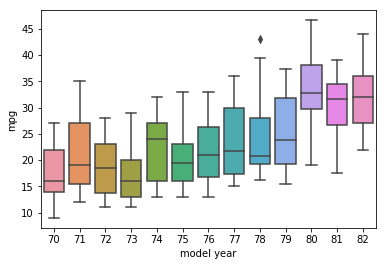

In [154]:
sns.boxplot(x="model year", y="mpg", data=raw_mpg)

Notice the presence of a single outlier for cars made in 1978. Notice a general upward trend in the general efficiency of cars in the early 80s. 

Let us now compare the rising mileage between Japanese and non-Japanese cars. 

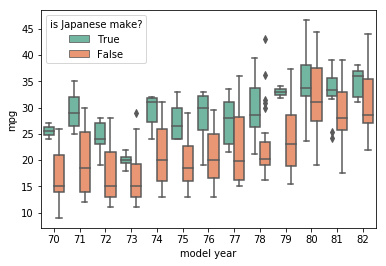

In [11]:
raw_mpg["is Japanese make?"] = raw_mpg["origin"].isin(["Japanese"])

sns.boxplot(x="model year", y="mpg", hue="is Japanese make?", data=raw_mpg, hue_order=[True, False],
            palette="Set2", dodge=True)

Note that Japanese cars seem to be generally more efficient in the 70s throughout to late 70s. But American and European cars do catch up in the early 80s. 

We can view boxplots horizontally as well. We do this to compare horsepower of the engines throughout the years. Perhaps the rise in mileage is due to decreased weight of the vehicle? 

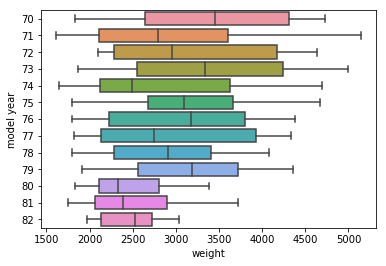

In [10]:
sns.boxplot(x="weight", y="model year", data=raw_mpg, orient="h")

We needed to specify the `orient` argument as `h` (for horizontal) because both the `weight` and `model year` variables are numerical. Since `model year` is plotted on the y-axis and `weight` on the x-axis, by specifying `h` for orient, we make `weight` to be the response variable. By default, seaborn assumes that anything numerical variable plotted on the `y` axis is a response variable.  

We may generate boxplots using `factorplot` which is a seaborn function used to visualize relationships between categorical "factors" and a continous response. What we will try to do is to plot the interaction between `cylinders`, `model year` and `origin`. 

In [15]:
pd.crosstab(index=raw_mpg.cylinders, columns=raw_mpg["origin"])

origin,American,European,Japanese
cylinders,,,
3,0,0,4
4,72,63,69
5,0,3,0
6,74,4,6
8,103,0,0


But we will only do this for 4 cylinder cars. 

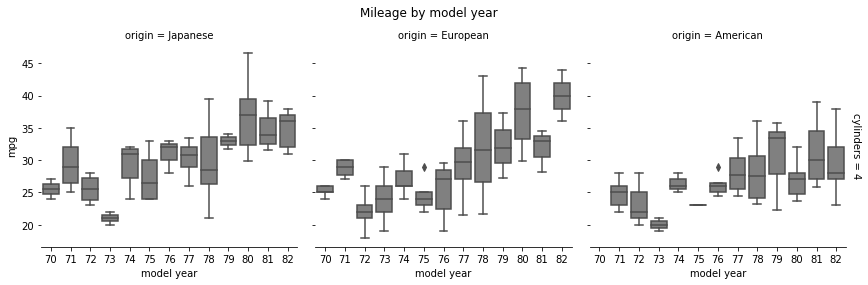

In [32]:
g = sns.factorplot(x="model year", y="mpg", data=raw_mpg[raw_mpg.cylinders==4], # Filter for entries with 4 cylinders
                   row="cylinders", col="origin", kind="box", margin_titles=True, 
                   color="grey")

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Mileage by model year")
g.despine(left=True);

This is an example of a *trellis plot*. 